In [2]:
from keras.datasets import imdb
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [3]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras import models

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [5]:
print("Training data: ")
print(X.shape)
print(y.shape)
print("Classes: ")
print(np.unique(y))

Training data: 
(50000,)
(50000,)
Classes: 
[0 1]


In [6]:
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


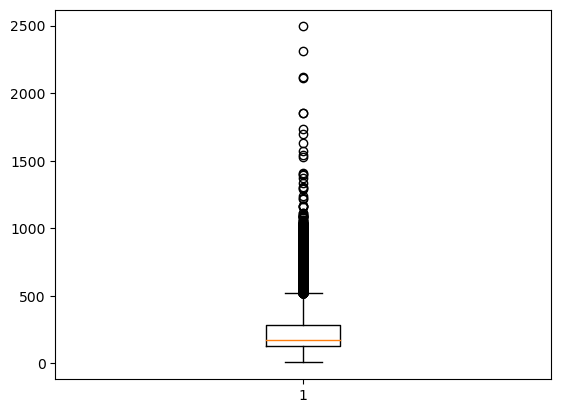

In [7]:
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
plt.boxplot(result)
plt.show()

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

In [9]:
def vectorize_sequences(sequences, dimension=5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [15]:
start_time_m1 = time.time()
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m1 = time.time() - start_time_m1

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5201 - acc: 0.7725 - val_loss: 0.3549 - val_acc: 0.8654
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2713 - acc: 0.8952 - val_loss: 0.2867 - val_acc: 0.8882
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2002 - acc: 0.9278 - val_loss: 0.2922 - val_acc: 0.8830
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1631 - acc: 0.9420 - val_loss: 0.3208 - val_acc: 0.8727
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1431 - acc: 0.9489 - val_loss: 0.3416 - val_acc: 0.8722
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1208 - acc: 0.9581 - val_loss: 0.3635 - val_acc: 0.8712
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1008 - acc: 0.9657 - val_loss: 0.3987 - val_acc: 0.8655
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0837 - a

In [16]:
print("The Dense Convolutional Neural Network 1 layer took %.4f seconds to train." % (total_time_m1))

The Dense Convolutional Neural Network 1 layer took 13.2817 seconds to train.


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

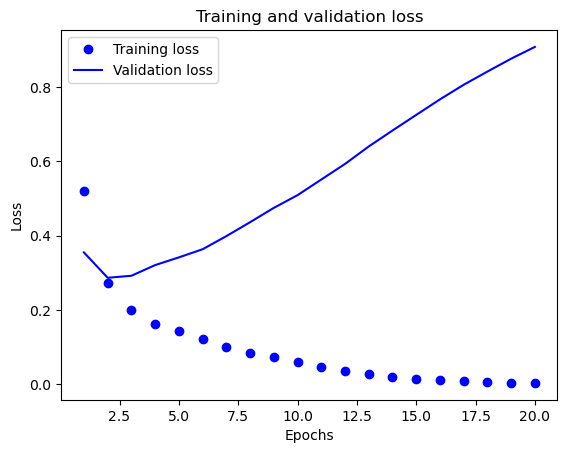

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

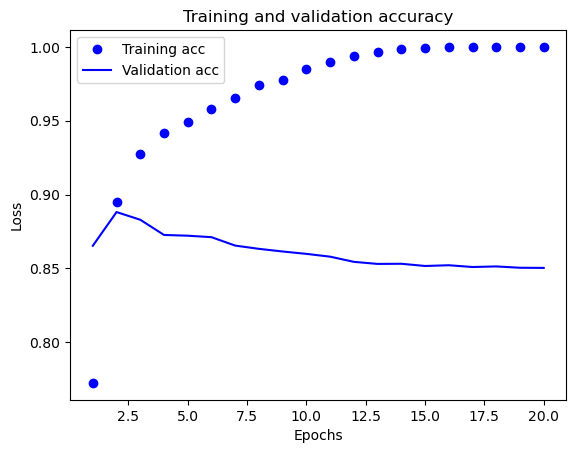

In [19]:
plt.clf()   
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160032    
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161,121
Trainable params: 161,121
Non-trainable params: 0
_________________________________________________________________


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, auc
pred = model.predict(x_test)
classes_x=np.argmax(pred,axis=1)
accuracy_score(y_test,classes_x)

782/782 [==============================] - 1s 2ms/step


0.5

[[12500     0]
 [12500     0]]


Text(0.5, 23.52222222222222, 'Predicted label')

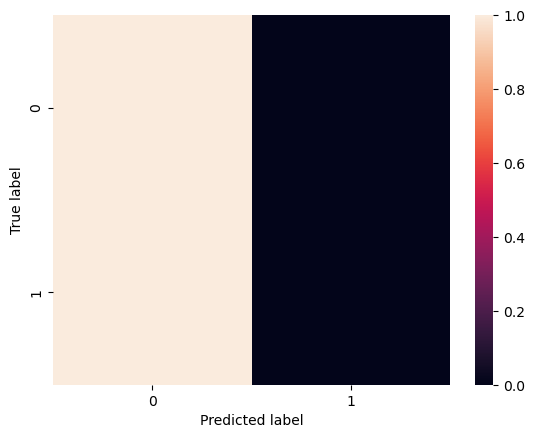

In [22]:
conf_mat = confusion_matrix(y_test, classes_x)
print(conf_mat)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [23]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(5000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [25]:
start_time_m2 = time.time()
history= model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
total_time_m2 = time.time() - start_time_m2

print("The Dense Convolutional Neural Network 2 layers took %.4f seconds to train." % (total_time_m2))

Epoch 1/20
30/30 [==============================] - 2s 31ms/step - loss: 0.5596 - acc: 0.7649 - val_loss: 0.3720 - val_acc: 0.8578
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2821 - acc: 0.8916 - val_loss: 0.2856 - val_acc: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1987 - acc: 0.9255 - val_loss: 0.2986 - val_acc: 0.8800
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1587 - acc: 0.9421 - val_loss: 0.3270 - val_acc: 0.8756
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1324 - acc: 0.9535 - val_loss: 0.3555 - val_acc: 0.8713
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1041 - acc: 0.9657 - val_loss: 0.3953 - val_acc: 0.8685
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0810 - acc: 0.9751 - val_loss: 0.4521 - val_acc: 0.8631
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0615 - a

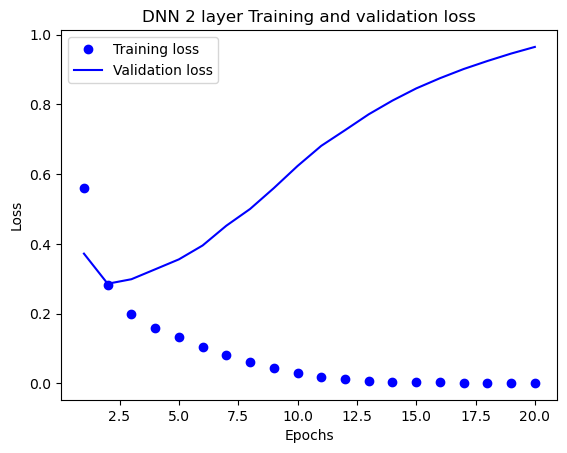

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('DNN 2 layer Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

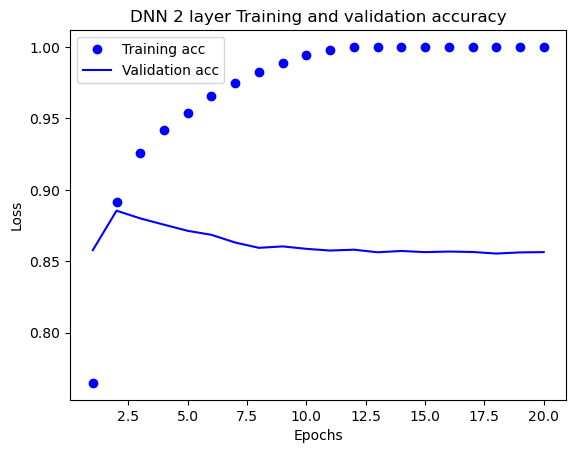

In [27]:
plt.clf()   
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('DNN 2 layer Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160032    
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 162,177
Trainable params: 162,177
Non-trainable params: 0
_________________________________________________________________


In [29]:
from numpy.ma.core import argmax
pred = model2.predict(x_test)
classes_x=argmax(pred,axis=-1)
accuracy_score(y_test,classes_x)

782/782 [==============================] - 1s 1ms/step


0.5